In [ ]:
#Random Forest trained with non-linear data, with data augmentation SAME for each label and using labels-v4
#Chooses between the 2 best predictions from the model (2best)

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import os
import time

In [2]:
# nombre de instancia
# número restricciones
# número variables
# si es lineal o no (true / false)
# porcentaje de restricciones unarias, binarias, porcentaje de ternarias, porcentaje cuaternarias o más 
# porcentaje de terminos unarios, binarios, porcentaje de ternarios, porcentaje cuaternarios o más 
# porcentaje de terminos en la función obj
# porcentaje de terminos positivos/negativos en restricciones
# porcentaje de terminos positivos/negativos en funcion obj
# timestep
# solver (label)

main_path="/global/scratch/users/cpezov/AAPBO/"
d_path=main_path+"datasets-v4/"
feat_path=d_path+"features/"

columns = ["# contraints","# variables","linearity","% 1 term constr","% 2 terms constr","% 3 terms constr","% 4+ terms constr","% degree 1 terms","% degree 2 terms","% degree 3 terms","% degree 4+ terms","% terms in obj func","% positive in constr","% positive in obj func","timestep","solver"]
names=[]
num_rest=[]
num_var=[]
linear=[]
r_unary=[]
r_binary=[]
r_ternary=[]
r_cuaternary=[]
t_unary=[]
t_binary=[]
t_ternary=[]
t_cuaternary=[]
t_fo=[]
t_pos_r=[]
t_pos_fo=[]
timestep=[]
solvers=[]

#Recolectar data de txt files
with open(d_path+"txt_files/data_ordered.txt") as f:
    lines = f.readlines()
    for l in lines:
        words=l.split()
        name=words[0][words[0].find("/")+1:]
        print(name)
        with open(feat_path+name) as feat_f:
            l=feat_f.readlines()
            w=l[0].split()
            for n in range(500): #repetir 500 cada instancia, para que cuadre con los timesteps
                names.append(w[0])
                num_rest.append(int(w[1]))
                num_var.append(int(w[2]))
                linear.append(int(w[3]))
                r_unary.append(float(w[4]))
                r_binary.append(float(w[5]))
                r_ternary.append(float(w[6]))
                r_cuaternary.append(float(w[7]))
                t_unary.append(float(w[8]))
                t_binary.append(float(w[9]))
                t_ternary.append(float(w[10]))
                t_cuaternary.append(float(w[11]))
                t_fo.append(float(w[12]))
                t_pos_r.append(float(w[13]))
                t_pos_fo.append(float(w[14]))
                timestep.append(n)
        
with open(main_path+"labels-v4.txt") as f:
    lines = f.readlines()
    for l in lines:
        for word in l.split():
            solvers.append(int(word))

Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-2-irabcde.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-2-irEDCBA.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-1-irabcde.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-1-irEDCBA.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-2-irabcde.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-2-irEDCBA.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-1-irabcde.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-1-irEDCBA.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-1-abcdeir.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-combined-EDCBAir.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-combined-irabcde.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-combined-irEDCBA.opb
Benchmark1/normalized-single-ob

Benchmark12/normalized-single-obj-f50-DC_side2.seq-A-2-combined-irEDCBA.opb
Benchmark13/normalized-single-obj-f52-ACTotalLoss.seq-B-2-2-irabcde.opb
Benchmark13/normalized-single-obj-f52-ACTotalLoss.seq-A-2-2-irabcde.opb
Benchmark13/normalized-single-obj-f52-ACTotalLoss.seq-B-2-1-irEDCBA.opb
Benchmark13/normalized-single-obj-f52-ACTotalLoss.seq-A-2-1-irabcde.opb
Benchmark13/normalized-single-obj-f52-ACTotalLoss.seq-A-2-1-irEDCBA.opb
Benchmark13/normalized-single-obj-f52-ACTotalLoss.seq-A-2-combined-irEDCBA.opb
Benchmark14/normalized-single-obj-f53-AC_FC1.seq-A-2-2-irabcde.opb
Benchmark14/normalized-single-obj-f53-AC_FC1.seq-A-2-2-irEDCBA.opb
Benchmark14/normalized-single-obj-f53-AC_FC1.seq-B-2-2-irabcde.opb
Benchmark14/normalized-single-obj-f53-AC_FC1.seq-B-2-2-irEDCBA.opb
Benchmark14/normalized-single-obj-f53-AC_FC1.seq-A-2-1-irEDCBA.opb
Benchmark14/normalized-single-obj-f53-AC_FC1.seq-B-2-1-irEDCBA.opb
Benchmark14/normalized-single-obj-f53-AC_FC1.seq-A-2-1-EDCBAir.opb
Benchmark14/norm

Benchmark30/normalized-graphpart_2g-0055-0062.opb
Benchmark30/normalized-graphpart_2g-0066-0066.opb
Benchmark30/normalized-graphpart_2g-0077-0077.opb
Benchmark30/normalized-graphpart_2g-0088-0088.opb
Benchmark30/normalized-graphpart_2g-0099-9211.opb
Benchmark30/normalized-graphpart_2g-1010-0824.opb
Benchmark31/normalized-graphpart_3g-0234-0234.opb
Benchmark31/normalized-graphpart_3g-0333-0333.opb
Benchmark31/normalized-graphpart_3g-0244-0244.opb
Benchmark31/normalized-graphpart_3g-0334-0334.opb
Benchmark31/normalized-graphpart_3g-0344-0344.opb
Benchmark31/normalized-graphpart_3g-0444-0444.opb
Benchmark32/normalized-pb351595.opb
Benchmark32/normalized-pb351555.opb
Benchmark32/normalized-pb351575.opb
Benchmark32/normalized-pb351535.opb
Benchmark32/normalized-pb302075.opb
Benchmark32/normalized-pb302035.opb
Benchmark32/normalized-pb302095.opb
Benchmark32/normalized-pb302055.opb
Benchmark33/normalized-qap.opb
Benchmark35/normalized-lo_8x8_001.opb.metafix.opb
Benchmark35/normalized-lo_8x8_0

Benchmark49/normalized-sporttournament38.lin.opb
Benchmark49/normalized-sporttournament40.lin.opb
Benchmark49/normalized-sporttournament42.lin.opb
Benchmark49/normalized-sporttournament44.lin.opb
Benchmark49/normalized-sporttournament46.lin.opb
Benchmark49/normalized-sporttournament48.lin.opb
Benchmark49/normalized-sporttournament50.lin.opb
Benchmark50/normalized-hw32-vm25p-opt.opb.negationfix.opb
Benchmark50/normalized-hw32-vm50p-opt.opb.negationfix.opb
Benchmark50/normalized-hw32-vm75p-opt.opb.negationfix.opb
Benchmark50/normalized-hw32-vm85p-opt.opb.negationfix.opb
Benchmark50/normalized-hw32-vm90p-opt.opb.negationfix.opb
Benchmark50/normalized-hw32-vm95p-opt.opb.negationfix.opb
Benchmark50/normalized-hw32-vm98p-opt.opb.negationfix.opb
Benchmark50/normalized-hw32-vm99p-opt.opb.negationfix.opb
Benchmark50/normalized-hw32-vm100p-opt.opb.negationfix.opb
Benchmark51/normalized-hw64-vm25p-opt.opb.negationfix.opb
Benchmark51/normalized-hw64-vm50p-opt.opb.negationfix.opb
Benchmark51/normal

Benchmark76/normalized-BA_RDC4.dot_unif_20null10mast_rapportOE2.0_TMAX60_K67_cod3.opb
Benchmark76/normalized-BA_RDC4.dot_unif_20null10mast_rapportOE2.0_TMAX60_K67_cod1.opb
Benchmark76/normalized-BA_RDC4.dot_unif_20null10mast_rapportOE1.0_TMAX60_K67_cod1.opb
Benchmark76/normalized-BA_RDC4.dot_unif_20null0mast_rapportOE1.0_TMAX180_K67_cod1.opb
Benchmark77/normalized-BA_RDC4.dot_unif_50null0mast_rapportOE1.0_TMAX300_K67_cod1.opb
Benchmark78/normalized-NG.dot_fibo_0null10mast_rapportOE1.0_TMAX180_K192_cod1.opb
Benchmark78/normalized-NG.dot_fibo_0null50mast_rapportOE2.0_TMAX300_K192_cod2.opb
Benchmark78/normalized-NG.dot_fibo_0null0mast_rapportOE2.0_TMAX15_K192_cod2.opb
Benchmark79/normalized-NG.dot_fibo_10null0mast_rapportOE1.0_TMAX180_K192_cod1.opb
Benchmark79/normalized-NG.dot_fibo_10null10mast_rapportOE2.0_TMAX15_K192_cod1.opb
Benchmark79/normalized-NG.dot_fibo_10null10mast_rapportOE1.0_TMAX300_K192_cod1.opb
Benchmark79/normalized-NG.dot_fibo_10null10mast_rapportOE1.0_TMAX15_K192_cod1.o

Benchmark102/normalized-minisat15_5_3_4_mh.opb
Benchmark102/normalized-minisat15_5_3_3_mh.opb
Benchmark102/normalized-minisat15_5_3_2_mh.opb
Benchmark102/normalized-minisat15_5_3_1_mh.opb
Benchmark102/normalized-minisat15_5_3_0_mh.opb
Benchmark103/normalized-minisat25_6_4_9_mh.opb
Benchmark103/normalized-minisat25_6_4_8_mh.opb
Benchmark103/normalized-minisat25_6_4_7_mh.opb
Benchmark103/normalized-minisat25_6_4_6_mh.opb
Benchmark103/normalized-minisat25_6_4_5_mh.opb
Benchmark103/normalized-minisat25_6_4_4_mh.opb
Benchmark103/normalized-minisat25_6_4_3_mh.opb
Benchmark103/normalized-minisat25_6_4_2_mh.opb
Benchmark103/normalized-minisat25_6_4_1_mh.opb
Benchmark103/normalized-minisat25_6_4_0_mh.opb
Benchmark104/normalized-minisat50_6_9_9_mh.opb
Benchmark104/normalized-minisat50_6_9_8_mh.opb
Benchmark104/normalized-minisat50_6_9_7_mh.opb
Benchmark104/normalized-minisat50_6_9_6_mh.opb
Benchmark104/normalized-minisat50_6_9_5_mh.opb
Benchmark104/normalized-minisat50_6_9_4_mh.opb
Benchmark104/

Benchmark147/normalized-bnatt400.opb
Benchmark148/normalized-datt256.opb
Benchmark149/normalized-ex1010-pi.opb
Benchmark149/normalized-ex9.opb
Benchmark150/normalized-f2000.opb
Benchmark151/normalized-go19.opb
Benchmark152/normalized-hanoi5.opb
Benchmark153/normalized-iis-bupa-cov.opb
Benchmark153/normalized-iis-pima-cov.opb
Benchmark154/normalized-macrophage.opb
Benchmark155/normalized-methanosarcina.opb
Benchmark156/normalized-mspp16.opb
Benchmark157/normalized-neos788725.opb
Benchmark157/normalized-neos-1440225.opb
Benchmark157/normalized-neos-538867.opb
Benchmark157/normalized-neos-1616732.opb
Benchmark157/normalized-neos-807456.opb
Benchmark157/normalized-neos-785912.opb
Benchmark157/normalized-neos-547911.opb
Benchmark157/normalized-neos-859770.opb
Benchmark157/normalized-neos-777800.opb
Benchmark157/normalized-neos-544324.opb
Benchmark157/normalized-neos18.opb
Benchmark157/normalized-neos-1109824.opb
Benchmark157/normalized-neos-506428.opb
Benchmark157/normalized-neos-631710.opb

Benchmark180/normalized-990.cudf.paranoid.opb
Benchmark180/normalized-902.cudf.paranoid.opb
Benchmark180/normalized-1034.cudf.paranoid.opb
Benchmark180/normalized-121.cudf.paranoid.opb
Benchmark180/normalized-122.cudf.paranoid.opb
Benchmark181/normalized-randaefc7c.cudf.paranoid.opb
Benchmark181/normalized-rand902db1.cudf.paranoid.opb
Benchmark181/normalized-rand65d021.cudf.paranoid.opb
Benchmark181/normalized-rand0c02bc.cudf.paranoid.opb
Benchmark181/normalized-rand4bf850.cudf.paranoid.opb
Benchmark181/normalized-rand35d0c8.cudf.paranoid.opb
Benchmark181/normalized-randa6997e.cudf.paranoid.opb
Benchmark181/normalized-rand2d8467.cudf.paranoid.opb
Benchmark181/normalized-randfe95e3.cudf.paranoid.opb
Benchmark181/normalized-randa09fe9.cudf.paranoid.opb
Benchmark181/normalized-randa491d5.cudf.paranoid.opb
Benchmark181/normalized-randb87834.cudf.paranoid.opb
Benchmark181/normalized-randf7d077.cudf.paranoid.opb
Benchmark181/normalized-randbccf2d.cudf.paranoid.opb
Benchmark181/normalized-ran

Benchmark191/normalized-aries-da_network_100_3__3_91__512.opb
Benchmark191/normalized-aries-da_network_100_3__3_91__1024.opb
Benchmark191/normalized-aries-da_network_100_3__3_91__2048.opb
Benchmark192/normalized-aries-da_network_500_3__212_366.opb
Benchmark192/normalized-aries-da_network_500_3__212_366__8.opb
Benchmark192/normalized-aries-da_network_500_3__212_366__16.opb
Benchmark192/normalized-aries-da_network_500_3__212_366__32.opb
Benchmark192/normalized-aries-da_network_500_3__212_366__64.opb
Benchmark192/normalized-aries-da_network_500_3__212_366__128.opb
Benchmark192/normalized-aries-da_network_500_3__212_366__256.opb
Benchmark192/normalized-aries-da_network_500_3__212_366__512.opb
Benchmark192/normalized-aries-da_network_500_3__212_366__1024.opb
Benchmark192/normalized-aries-da_network_500_3__212_366__2048.opb
Benchmark193/normalized-aries-da_network_1000_5__369_766.opb
Benchmark193/normalized-aries-da_network_1000_5__369_766__8.opb
Benchmark193/normalized-aries-da_network_1000

Benchmark210/normalized-bsg_100_10_3.opb
Benchmark210/normalized-bsg_100_25_2.opb
Benchmark210/normalized-bsg_100_10_4.opb
Benchmark210/normalized-bsg_100_25_4.opb
Benchmark210/normalized-bsg_100_25_1.opb
Benchmark210/normalized-bsg_100_25_3.opb
Benchmark211/normalized-bsg_200_25_3.opb
Benchmark211/normalized-bsg_200_25_1.opb
Benchmark211/normalized-bsg_200_25_2.opb
Benchmark211/normalized-bsg_200_25_4.opb
Benchmark211/normalized-bsg_200_25_5.opb
Benchmark211/normalized-bsg_200_10_1.opb
Benchmark211/normalized-bsg_200_10_5.opb
Benchmark211/normalized-bsg_200_10_2.opb
Benchmark211/normalized-bsg_200_10_3.opb
Benchmark211/normalized-bsg_200_10_4.opb
Benchmark212/normalized-bsg_500_60_5.opb
Benchmark212/normalized-bsg_500_60_4.opb
Benchmark212/normalized-bsg_500_60_3.opb
Benchmark212/normalized-bsg_500_60_2.opb
Benchmark212/normalized-bsg_500_60_1.opb
Benchmark212/normalized-bsg_500_25_5.opb
Benchmark212/normalized-bsg_500_25_4.opb
Benchmark212/normalized-bsg_500_25_3.opb
Benchmark212/nor

Benchmark227/factor-mod-size=6-P0=31-P1=31-P2=37-P3=37-B.opb
Benchmark227/factor-mod-size=6-P0=59-P1=23-P2=29-P3=41-B.opb
Benchmark227/factor-mod-size=6-P0=11-P1=37-P2=37-P3=29-B.opb
Benchmark227/factor-mod-size=6-P0=47-P1=67-P2=7-P3=59-P4=59-B.opb
Benchmark227/factor-mod-size=6-P0=47-P1=29-P2=11-P3=29-P4=53-B.opb
Benchmark227/factor-mod-size=6-P0=13-P1=23-P2=59-P3=41-P4=53-B.opb
Benchmark227/factor-mod-size=6-P0=2-P1=31-P2=13-P3=31-P4=31-B.opb
Benchmark227/factor-mod-size=6-P0=53-P1=13-P2=23-P3=47-P4=2-B.opb
Benchmark227/factor-mod-size=6-P0=53-P1=43-P2=37-P3=59-P4=29-P5=29-B.opb
Benchmark227/factor-mod-size=6-P0=53-P1=17-P2=17-P3=13-P4=17-P5=61-B.opb
Benchmark227/factor-mod-size=6-P0=47-P1=17-P2=37-P3=53-P4=13-P5=13-B.opb
Benchmark227/factor-mod-size=6-P0=31-P1=53-P2=29-P3=29-P4=31-P5=19-B.opb
Benchmark227/factor-mod-size=6-P0=37-P1=59-P2=17-P3=29-P4=2-P5=29-B.opb
Benchmark227/factor-mod-size=6-P0=59-P1=23-P2=2-P3=37-P4=53-P5=47-P6=31-B.opb
Benchmark227/factor-mod-size=6-P0=59-P1=37-

Benchmark230/factor-mod-size=9-P0=487-P1=127-P2=347-P3=419-P4=367-P5=149-P6=419-B.opb
Benchmark230/factor-mod-size=9-P0=109-P1=191-P2=263-P3=37-P4=317-P5=89-P6=131-B.opb
Benchmark230/factor-mod-size=9-P0=251-P1=257-P2=19-P3=349-P4=257-P5=479-P6=367-B.opb
Benchmark230/factor-mod-size=9-P0=67-P1=349-P2=67-P3=499-P4=79-P5=347-P6=307-B.opb
Benchmark230/factor-mod-size=9-P0=509-P1=457-P2=223-P3=127-P4=431-P5=67-P6=17-P7=479-B.opb
Benchmark230/factor-mod-size=9-P0=257-P1=53-P2=163-P3=163-P4=251-P5=269-P6=479-P7=113-B.opb
Benchmark230/factor-mod-size=9-P0=103-P1=277-P2=401-P3=67-P4=337-P5=17-P6=499-P7=23-B.opb
Benchmark230/factor-mod-size=9-P0=211-P1=317-P2=331-P3=491-P4=101-P5=283-P6=487-P7=439-B.opb
Benchmark230/factor-mod-size=9-P0=137-P1=101-P2=5-P3=409-P4=419-P5=401-P6=61-P7=239-B.opb
Benchmark230/factor-mod-size=9-P0=383-P1=149-P2=409-P3=307-P4=127-P5=191-P6=227-P7=281-P8=211-B.opb
Benchmark230/factor-mod-size=9-P0=131-P1=307-P2=281-P3=173-P4=479-P5=461-P6=107-P7=337-P8=353-B.opb
Benchm

Benchmark246/normalized-mps-v2-20-10-neos13.opb
Benchmark246/normalized-mps-v2-20-10-neos6.opb
Benchmark246/normalized-mps-v2-20-10-neos12.opb
Benchmark246/normalized-mps-v2-20-10-neos2.opb
Benchmark246/normalized-mps-v2-20-10-neos7.opb
Benchmark246/normalized-mps-v2-20-10-neos3.opb
Benchmark247/normalized-mps-v2-20-10-nug08.opb
Benchmark248/normalized-mps-v2-20-10-qap10.opb
Benchmark249/normalized-mps-v2-20-10-swath3.opb
Benchmark249/normalized-mps-v2-20-10-swath2.opb
Benchmark249/normalized-mps-v2-20-10-swath1.opb
Benchmark250/normalized-mps-v2-20-10-A2C1S1.opb
Benchmark250/normalized-mps-v2-20-10-A1C1S1.opb
Benchmark251/normalized-mps-v2-20-10-B2C1S1.opb
Benchmark251/normalized-mps-v2-20-10-B1C1S1.opb
Benchmark252/normalized-mps-v2-20-10-berlin_5_8_0.opb
Benchmark253/normalized-mps-v2-20-10-bg512142.opb
Benchmark254/normalized-mps-v2-20-10-biella1.opb
Benchmark255/normalized-mps-v2-20-10-blp-ir98.opb
Benchmark255/normalized-mps-v2-20-10-blp-ic97.opb
Benchmark255/normalized-mps-v2-20

Benchmark297/normalized-factor-sizeN=480-sizeP=241-sizeQ=480-896328136-max.opb
Benchmark297/normalized-factor-sizeN=480-sizeP=241-sizeQ=480-57455727.opb
Benchmark298/normalized-factor-sizeN=500-sizeP=251-sizeQ=500-293748522.opb
Benchmark298/normalized-factor-sizeN=500-sizeP=251-sizeQ=500-293748522-max.opb
Benchmark298/normalized-factor-sizeN=500-sizeP=251-sizeQ=500-280035866.opb
Benchmark298/normalized-factor-sizeN=500-sizeP=251-sizeQ=500-280035866-max.opb
Benchmark299/normalized-mps-v2-20-10-fit1d.opb
Benchmark300/normalized-mps-v2-20-10-air01.opb
Benchmark300/normalized-mps-v2-20-10-air02.opb
Benchmark300/normalized-mps-v2-20-10-air06.opb
Benchmark300/normalized-mps-v2-20-10-air03.opb
Benchmark301/normalized-mps-v2-20-10-enigma.opb
Benchmark302/normalized-mps-v2-20-10-p0291.opb
Benchmark302/normalized-mps-v2-20-10-p0282.opb
Benchmark302/normalized-mps-v2-20-10-p6000.opb
Benchmark303/normalized-mps-v2-20-10-pipex.opb
Benchmark304/normalized-mps-v2-20-10-vpm1.opb
Benchmark305/normalize

Benchmark327/normalized-reduced-mps-v2-20-10-air02.opb
Benchmark327/normalized-reduced-mps-v2-20-10-p6000.opb
Benchmark327/normalized-reduced-mps-v2-20-10-air06.opb
Benchmark327/normalized-reduced-mps-v2-20-10-air03.opb
Benchmark327/normalized-reduced-mps-v2-20-10-dcmulti.opb
Benchmark327/normalized-reduced-mps-v2-20-10-fixnet3.opb
Benchmark327/normalized-reduced-mps-v2-20-10-fixnet4.opb
Benchmark327/normalized-reduced-mps-v2-20-10-set1cl.opb
Benchmark327/normalized-reduced-mps-v2-20-10-set1al.opb
Benchmark327/normalized-reduced-mps-v2-20-10-gen.opb
Benchmark327/normalized-reduced-mps-v2-20-10-khb05250.opb
Benchmark327/normalized-reduced-mps-v2-20-10-misc06.opb
Benchmark327/normalized-reduced-mps-v2-20-10-misc04.opb
Benchmark328/normalized-reduced-mps-v2-20-10-gt2.opb
Benchmark328/normalized-reduced-mps-v2-20-10-blend2.opb
Benchmark328/normalized-reduced-mps-v2-20-10-qnet1_o.opb
Benchmark328/normalized-reduced-mps-v2-20-10-qnet1.opb
Benchmark328/normalized-reduced-mps-v2-20-10-gesa3_o.

Benchmark341/normalized-aim-200-6_0-yes1-3.opb
Benchmark341/normalized-aim-200-6_0-yes1-4.opb
Benchmark343/normalized-f600.opb
Benchmark343/normalized-f1000.opb
Benchmark343/normalized-f2000.opb
Benchmark344/normalized-g125.17.opb
Benchmark344/normalized-g125.18.opb
Benchmark344/normalized-g250.15.opb
Benchmark344/normalized-g250.29.opb
Benchmark345/normalized-hanoi4.opb
Benchmark345/normalized-hanoi5.opb
Benchmark346/normalized-ii8a1.opb
Benchmark346/normalized-ii8a2.opb
Benchmark346/normalized-ii32e1.opb
Benchmark346/normalized-ii32c1.opb
Benchmark346/normalized-ii32b1.opb
Benchmark346/normalized-ii8a3.opb
Benchmark346/normalized-ii32c2.opb
Benchmark346/normalized-ii8b1.opb
Benchmark346/normalized-ii32b2.opb
Benchmark346/normalized-ii32e2.opb
Benchmark346/normalized-ii32d1.opb
Benchmark346/normalized-ii8a4.opb
Benchmark346/normalized-ii32c3.opb
Benchmark346/normalized-ii8c1.opb
Benchmark346/normalized-ii8e1.opb
Benchmark346/normalized-ii8d1.opb
Benchmark346/normalized-ii8b2.opb
Bench

Benchmark363/normalized-ex6inp.r.opb
Benchmark363/normalized-m50_100_10_10.r.opb
Benchmark363/normalized-m100_50_20_20.r.opb
Benchmark363/normalized-m50_100_10_15.r.opb
Benchmark363/normalized-dk512x.r.opb
Benchmark363/normalized-m50_100_50_50.r.opb
Benchmark363/normalized-m50_100_70_70.r.opb
Benchmark363/normalized-m100_50_40_40.r.opb
Benchmark363/normalized-m100_50_10_10.r.opb
Benchmark363/normalized-m100_50_30_30.r.opb
Benchmark363/normalized-m50_100_30_30.r.opb
Benchmark363/normalized-m50_100_90_90.r.opb
Benchmark363/normalized-maincont.r.opb
Benchmark363/normalized-m100_100_10_15.r.opb
Benchmark363/normalized-m100_100_10_30.r.opb
Benchmark363/normalized-m100_100_30_30.r.opb
Benchmark363/normalized-m100_100_50_50.r.opb
Benchmark363/normalized-m100_100_70_70.r.opb
Benchmark363/normalized-m100_100_90_90.r.opb
Benchmark363/normalized-m100_100_10_10.r.opb
Benchmark363/normalized-ex4inp.r.opb
Benchmark363/normalized-m100_300_10_10.r.opb
Benchmark363/normalized-m100_300_10_14.r.opb
Bench

Benchmark374/normalized-factor-size=9-P=257-Q=503.opb
Benchmark374/normalized-factor-size=9-P=97-Q=509.opb
Benchmark374/normalized-factor-size=9-P=127-Q=149.opb
Benchmark374/normalized-factor-size=9-P=127-Q=211.opb
Benchmark374/normalized-factor-size=9-P=251-Q=379.opb
Benchmark374/normalized-factor-size=9-P=127-Q=359.opb
Benchmark374/normalized-factor-size=9-P=127-Q=389.opb
Benchmark374/normalized-factor-size=9-P=127-Q=487.opb
Benchmark374/normalized-factor-size=9-P=239-Q=487.opb
Benchmark374/normalized-factor-size=9-P=127-Q=491.opb
Benchmark374/normalized-factor-size=9-P=127-Q=499.opb
Benchmark374/normalized-factor-size=9-P=13-Q=179.opb
Benchmark374/normalized-factor-size=9-P=131-Q=137.opb
Benchmark374/normalized-factor-size=9-P=131-Q=157.opb
Benchmark374/normalized-factor-size=9-P=131-Q=163.opb
Benchmark374/normalized-factor-size=9-P=131-Q=277.opb
Benchmark374/normalized-factor-size=9-P=223-Q=499.opb
Benchmark374/normalized-factor-size=9-P=139-Q=191.opb
Benchmark374/normalized-factor

In [3]:
#Crear dataframe
# dataframe with no names, so that it doesn't convert everything to str 
data=np.array([num_rest,num_var,linear,r_unary,r_binary,r_ternary,r_cuaternary,t_unary,t_binary,t_ternary,t_cuaternary,t_fo,t_pos_r,t_pos_fo,timestep,solvers])
df = pd.DataFrame(data.T, columns=columns)

#print(df.head())

In [4]:
x=df[["# contraints","# variables","linearity","% 1 term constr","% 2 terms constr","% 3 terms constr","% 4+ terms constr","% degree 1 terms","% degree 2 terms","% degree 3 terms","% degree 4+ terms","% terms in obj func","% positive in constr","% positive in obj func","timestep"]]
y=df[['solver']]

#agrupar diferentes timestpes de cada instancia en un mismo set
random.seed(9) #same seed to generate same random numbers as other models
train_indx=[]
inst_train=[]
test_indx=[]
inst_test=[]
for i in range(0,3128): # v4
    r = random.randint(0,2)
    if(r==2):
        inst_test.append(i)
        for j in range(0,500):
            test_indx.append(500*i+j)
    else:
        inst_train.append(i)
        for j in range(0,500):
            train_indx.append(500*i+j)

x_train=x.iloc[train_indx]
x_test=x.iloc[test_indx]
y_train=y.iloc[train_indx]
y_test=y.iloc[test_indx]
y_train_og=y.iloc[train_indx]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1027000, 15)
(537000, 15)
(1027000, 1)
(537000, 1)


In [5]:
#Data augmentation para training set de instancias con clases distintas a gurobi (5)

indx_dis=[] #indexes of instances with disadvantaged labels 

#identificar instancias que tengan clase distinta a gurobi
for i in inst_train:
    has_dis=False
    for j in range(500):
        ind=500*i+j
        if(solvers[ind]!=5):
            has_dis=True
            break
    if(has_dis):
        for j in range(500):
            indx_dis.append(500*i+j)

print(len(indx_dis))
print(len(train_indx), end="\n\n")            

#agregar las instancias al final de x_train e y_train
x_train_dis=x.iloc[indx_dis]
y_train_dis=y.iloc[indx_dis]

x_train=x_train.append(x_train_dis)
y_train=y_train.append(y_train_dis)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

674500
1027000

(1701500, 15)
(537000, 15)
(1701500, 1)
(537000, 1)


In [6]:
rf_model = RandomForestClassifier(n_estimators=100, max_features="sqrt", criterion="gini",random_state=3)
rf_model.fit(np.nan_to_num(x_train.astype(np.float32)), y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [7]:
y_pred = rf_model.predict(np.nan_to_num(x_test.astype(np.float32)))

In [8]:
print("Accuracy",metrics.accuracy_score(y_test.values.ravel(), y_pred))
pred = rf_model.predict_proba(np.nan_to_num(x_test.astype(np.float32)))
print("Loss",metrics.log_loss(y_test.values.ravel(), pred))

Accuracy 0.710635009310987
Loss 4.437879656553837


## Select between the best 2 predictions (2best)

In [9]:
pred

array([[0.        , 0.63998413, 0.        , ..., 0.        , 0.        ,
        0.36001587],
       [0.        , 0.68115729, 0.        , ..., 0.        , 0.        ,
        0.31884271],
       [0.        , 0.64221717, 0.        , ..., 0.        , 0.        ,
        0.35778283],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [10]:
#Buscar en pred, la 2da mejor opcion (2best)
# pred es un np.array con shape (537000, 8)

n_inst=len(pred) # 537000: n_inst_test*500
n_solv=len(pred[0])

#guardar en 2 arreglos (2best): 1-(número de solver de mejor prediccion) y 2-(número de solver en 2da mejor prediccion)
best1_sol = y_pred
best2_sol = np.zeros(n_inst)

c=np.zeros(n_solv)

for i in range(n_inst):
    b2=-1
    same=True
    for j in range(n_solv):           
        if(j==best1_sol[i]):
            continue       
        #inicializar
        if(b2==-1):
            b2=j
        #busca el 2do mejor
        elif(pred[i][j]>pred[i][b2]):
            b2=j
        
        #verificar si todos son la misma prob
        if(pred[i][j]!=pred[i][b2]):
            same=False
    #if todos son iguales, elige gurobi(5)
    if(same):
        b2=5
    best2_sol[i]=b2
    c[b2]=c[b2]+1
        
print(c)

[ 43950.  15090.  37032.  21596.  23227. 323618.  39369.  33118.]


In [11]:
#Obtener de data_graph timesteps y valores de cada solver

data = main_path+"results/processed_data/data_graph-v4.txt"

with open(data,'r') as text:
    time_unit = text.readline().replace("\n","")
    solvers = text.readline().split() #Solver names
    datasets = text.readline().split() #Dataset names
    instances = [] #Instances names
    N_SOLVERS = len(solvers)
    N_DATASETS = len(datasets)
    N_INSTANCES = [] #Number of instances for each dataset
    N_POINTS = [] #Number of points for each solver for each instance
    results = [] #Contains every point of every instance
    plot_max = [] #Artificial final point of every plot for better visualization
    maxmax = 0 #Maximum artificial final point
    for d in range(N_DATASETS):
        N_INSTANCES.append(int(text.readline()))
        for i in range(N_INSTANCES[d]):
            instances.append(text.readline().replace("\n",""))
            max = 0
            aux = []
            for s in range(N_SOLVERS):
                line = text.readline().split()
                count_points = 0
                for point in line:
                    count_points = count_points + 1
                    point = point.split(':')
                    aux.append([float(point[0]), float(point[1]), s])
                    #aux.append([math.log(float(point[0]),2), float(point[1]), s])
                N_POINTS.append(count_points)  
                if aux[-1][0]>max:
                    max = aux[-1][0]
            results.append(aux)    
            plot_max.append(int(max+max*0.1))
            if maxmax < max:
                maxmax = max  
    bt = text.readline().split()
    bar_times = []
    for b in bt:
        bar_times.append(float(b))
    maxmax = maxmax * 1.1

In [12]:
new_times=[]
for b in bar_times:
    new_times.append(b/2) #n_best_solvers = 2   (2best)
    
#Obtener results solo de test set
res_test = [results[index] for index in inst_test]

In [13]:
#Elegir entre el mejor o segundo mejor, en tiempos new_timestep (ts/2) (2best)
#(Buscando entre los resultados de test)

#Solvers 0:No solution, 1:Clasp, 2:NaPS, 3:OpenWBO-lsu, 4:OpenWBO-oll, 5:Gurobi, 6:LS-PBO, 7:RoundingSAT
## OBS: en res_test, solvers estan enumerados sin considerar 0:No solution

import math

''' opciones:
- 2 solvers, ambos con solución - se elige el solver con mejor sol (o cualquiera si las sols son iguales)
- 2 solvers, solo 1 tiene solucion - se elige el con solucion
- 2 solvers, ambos sin solucion - se elige cualquiera
- 1 no_sol, 1 solver con solucion - se elige el solver
- 1 no_sol, 1 solver sin solucion - se elige "no_sol" 
'''

real_best = np.full((len(res_test),500),np.nan) #Guarda el numero del mejor solver

for i in range(len(res_test)):
    for j in range(len(new_times)):
        t = new_times[j]
        solv1=best1_sol[500*i+j]
        solv2=best2_sol[500*i+j]
        val_1=None
        val_2=None
        for point in res_test[i]: #itera por todos los resultados de test (con sus respectivos tiempos, valor y solver)
            if (point[0]<t or math.isclose(point[0],t)): #está dentro del tiempo new_time (menor o igual)
                s=point[2]+1 #res_test tiene solvers enumerados del 0 al 6
                solution=point[1]
                if(s==solv1):
                    val_1=solution
                if(s==solv2):
                    val_2=solution
        
        if(val_1!=None and val_2!=None):
            if(val_1<=val_2): #problema de minimizacion
                real_best[i][j]=solv1
            else:
                real_best[i][j]=solv2
        elif(val_1!=None and val_2==None):
            real_best[i][j]=solv1
        elif(val_1==None and val_2!=None):
            real_best[i][j]=solv2
        elif(val_1==None and val_2==None):
            if(solv1==0 or solv2==0):
                real_best[i][j]=0
            else:
                real_best[i][j]=solv1 #Aunque no tenga solucion, nos quedamos con la primera prediccion

In [14]:
y_pred_best=real_best.flatten()
print("Accuracy",metrics.accuracy_score(y_test.values.ravel(), y_pred_best))

Accuracy 0.7780409683426444


In [14]:
#Save
y_pred_np=real_best
f = open(main_path+"models/v4/randomForest_nonlinear-v4-2best/results/y_preds.txt", "w")
np.savetxt(f,y_pred_np.reshape(y_pred_np.shape[0],-1),fmt='%s')
f.close()

In [15]:
#Feature importances
importances = rf_model.feature_importances_
feats = x.columns

i=0
while i < len(feats):
    print("Importance of feature "+feats[i]+" is "+str(importances[i]))
    i = i+1

Importance of feature # contraints is 0.1028437355957806
Importance of feature # variables is 0.08813278476674283
Importance of feature linearity is 0.00834084884161764
Importance of feature % 1 term constr is 0.04885664334431239
Importance of feature % 2 terms constr is 0.058629094028526146
Importance of feature % 3 terms constr is 0.05942643644455577
Importance of feature % 4+ terms constr is 0.0719427544797268
Importance of feature % degree 1 terms is 0.10445810550400604
Importance of feature % degree 2 terms is 0.02991276351266553
Importance of feature % degree 3 terms is 0.0014542661796870674
Importance of feature % degree 4+ terms is 0.0015445930328336294
Importance of feature % terms in obj func is 0.12623096904839545
Importance of feature % positive in constr is 0.09046798480611397
Importance of feature % positive in obj func is 0.049564512740183156
Importance of feature timestep is 0.15819450767485327


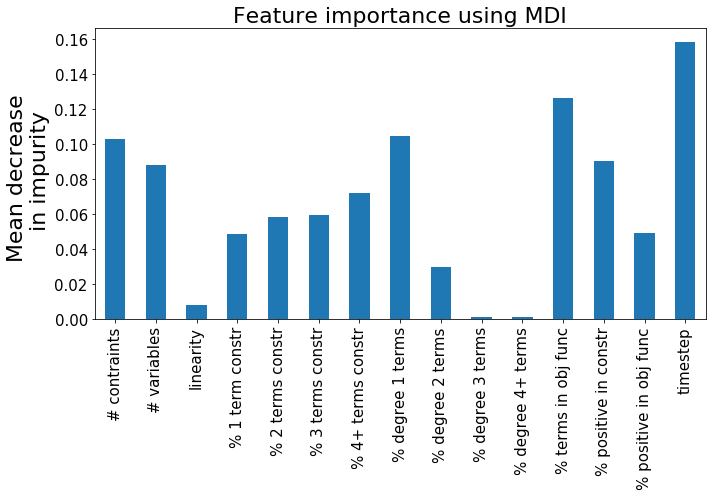

In [17]:
#Grafico feature importances
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feats)

fsize = 22

fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax, figsize = (10,7), fontsize=fsize-7)
forest_importances.plot.bar(ax=ax, figsize = (10,7), fontsize=fsize-7)
plt.xticks(rotation=90, fontsize=fsize-7)
ax.set_title("Feature importance using MDI", fontsize=fsize)
ax.set_ylabel("Mean decrease \n in impurity", fontsize=fsize)
fig.tight_layout()

#print(importances)

https://data36.com/random-forest-in-python/


# Prediction Time

### (not modified for "2best" model)

In [14]:
#Calcular tiempos de predicción por cada par instancia-tiempo de test
#(Correr esto se demora 1 hora aprox)

l=int(len(y_pred)/500)
t_preds=np.empty(l*500)
i=0

#prediccion
for idx in test_indx:
    #crear dataframe de solo esa instancia-timestep
    x_i = x.iloc[[idx]]
    
    #hacer predicción y medir tiempo
    start=time.time()
    y_i = rf_model.predict(np.nan_to_num(x_i.astype(np.float32)))
    tiempo=time.time()-start
    t_preds[i]=tiempo
    
    i=i+1

In [15]:
#Guardar tiempos de prediccion

print(t_preds)
f = open(main_path+"models/results-v4/pred_times/t_pred_randomForest_nonlinear-v4-2best.txt", "w")
np.savetxt(f, t_preds, delimiter=" ", fmt="%s")
f.close()

[0.02369356 0.0182972  0.01643324 ... 0.00870848 0.0086267  0.00857043]


## Otra opcion para obtener el mejor solver (se obtiene el mismo resultado)

In [15]:
#Obtener las soluciones, para todos los solvers, para todas las instancias de test, en cada uno de los new_timesteps

res_solvers = np.full((N_SOLVERS, len(res_test), 500),np.nan) #for each test instance, each new_time, we save the value of the result for each solver
#if a solver has no solution yet, nan is stored

for i in range(len(res_test)):
    for t_count in range(len(new_times)):
        t=new_times[t_count]
        for point in res_test[i]: #itera por todos los resultados (con sus respectivos tiempos, valor y solver)
            if (point[0]<t or math.isclose(point[0],t)): #está dentro del tiempo new_time (menor o igual)
                solution=point[1]
                s=point[2]
                res_solvers[s][i][t_count]=solution

In [19]:
#Buscar el mejor valor entre ambos solvers (2best), para cada <instancia, new_timestep>

real_best_otro = np.full((len(res_test),500),np.nan) #Guarda el numero del mejor solver

for i in range(len(res_test)):
    for j in range(len(new_times)):
        solv1=best1_sol[500*i+j] #Numero de solvers en best1_sol van desde el 0 al 7 (incluye "No Sol")
        solv2=best2_sol[500*i+j]
        
        if(solv1==0):
            val1=np.nan
        else:
            val1=res_solvers[int(solv1-1)][i][j]
        
        if(solv2==0):
            val2=np.nan
        else:
            val2=res_solvers[int(solv2-1)][i][j]
        
        
        if(not(np.isnan(val1)) and not(np.isnan(val2))): #Ambos tienen solucion
            if(val1<=val2): #minimizacion
                real_best_otro[i][j]=solv1
            else:
                real_best_otro[i][j]=solv2
        elif(not(np.isnan(val1)) and np.isnan(val2)): #val2 es nan
            real_best_otro[i][j]=solv1
        elif(np.isnan(val1) and not(np.isnan(val2))): #val1 es nan
            real_best_otro[i][j]=solv2
        elif(np.isnan(val1) and np.isnan(val2)): #ambos son nan
            if(solv1==0 or solv2==0):
                real_best_otro[i][j]=0
            else:
                real_best_otro[i][j]=solv1

In [20]:
y_pred_best_otro=real_best_otro.flatten()
print("Accuracy",metrics.accuracy_score(y_test.values.ravel(), y_pred_best_otro))

Accuracy 0.7780409683426444


In [21]:
for i in range(len(res_test)):
    for j in range(len(new_times)):
        if(real_best[i][j]!=real_best_otro[i][j]):
            print(i,j)
            
#(Son iguales)